# 0.0. IMPORTS 

In [191]:
import math
import warnings
import pandas             as pd
import numpy              as np
import seaborn            as sns
import ipywidgets         as widgets
import matplotlib.pyplot  as plt

from tabulate             import tabulate
from collections          import Counter
from IPython.display      import Image
from matplotlib           import gridspec
from datetime             import date, datetime
from geopy                import distance
from geopy.distance       import great_circle

## 0.1. Helper Functions

In [190]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24

    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
    warnings.filterwarnings('ignore')
    warnings.simplefilter('ignore')

    sns.set()
    
jupyter_settings()

## 0.2. Loading data

In [3]:
data_raw = pd.read_csv('kc_house_data.csv')

# 1.0. DATA DESCRIPTION

In [4]:
data = data_raw.copy()

## 1.1. Data Dimensions

In [5]:
raw_size = data.shape
print('Number of rows:', raw_size[0])
print('Number of cols:', raw_size[1])

Number of rows: 21613
Number of cols: 21


## 1.2. Data Types

In [6]:
data['date'] = pd.to_datetime(data['date'])
data['bathrooms'] = data['bathrooms'].astype('int64')

In [7]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.3. Data Cleaning

### 1.3.1 Checando Dados sem registro

In [8]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 1.3.2. Duplicate Data

In [9]:
data = data.drop_duplicates(subset=['id'],  keep = 'last')

In [10]:
print('Número de linhas:', data.shape[0])
print('Número de colunas:', data.shape[1])
print('Duplicatas removidas:', raw_size[0] - data.shape[0])

Número de linhas: 21436
Número de colunas: 21
Duplicatas removidas: 177


## 1.4. Check Data Types 

In [11]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

## 1.5. Descriptive Statistical

In [12]:
num_attributes = data.select_dtypes(include=['int64','float64'])

### 1.5.1. Numerical Attributes 

In [13]:
# central tedency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concat

m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.00,9900000190.00,9899000088.00,4580765328.18,3904921185.00,2876522535.73,0.24,-1.26
1,price,75000.00,7700000.00,7625000.00,541649.96,450000.00,367306.36,4.04,34.73
2,bedrooms,0.00,33.00,33.00,3.37,3.00,0.93,1.99,49.64
3,bathrooms,0.00,8.00,8.00,1.75,2.00,0.73,0.90,2.00
4,sqft_living,290.00,13540.00,13250.00,2082.70,1920.00,919.13,1.47,5.25
5,sqft_lot,520.00,1651359.00,1650839.00,15135.64,7614.00,41537.65,13.04,284.08
6,floors,1.00,3.50,2.50,1.50,1.50,0.54,0.61,-0.49
7,waterfront,0.00,1.00,1.00,0.01,0.00,0.09,11.34,126.55
8,view,0.00,4.00,4.00,0.24,0.00,0.77,3.39,10.83
9,condition,1.00,5.00,4.00,3.41,3.00,0.65,1.04,0.52


## 1.6. Check Error or Outliers

In [14]:
# checking house attributes with 33 bedrooms
data[data['bedrooms'] > 8].sort_values('bedrooms',ascending=False)[['id','price','bedrooms','bathrooms','sqft_living','sqft_lot']]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot
15870,2402100895,640000.00,33,1,1620,6000
8757,1773100755,520000.00,11,3,3000,4960
13314,627300145,1148000.00,10,5,4590,10920
15161,5566100170,650000.00,10,2,3610,11914
19254,8812401450,660000.00,10,3,2920,3745
4096,1997200215,599999.00,9,4,3830,6988
4235,2902200015,700000.00,9,3,3680,4400
6079,9822700190,1280000.00,9,4,3650,5000
8546,424049043,450000.00,9,7,4050,6504
16844,8823900290,1400000.00,9,4,4620,5508


### 1.6.1 Remove data error

In [15]:
# house with 33 bedrooms considered as error
data = data.drop(15870, axis=0)

# 2.0. FEATURE ENGINEERING

In [16]:
df = data.copy()

## 2.1. Mind Map Hypotheses

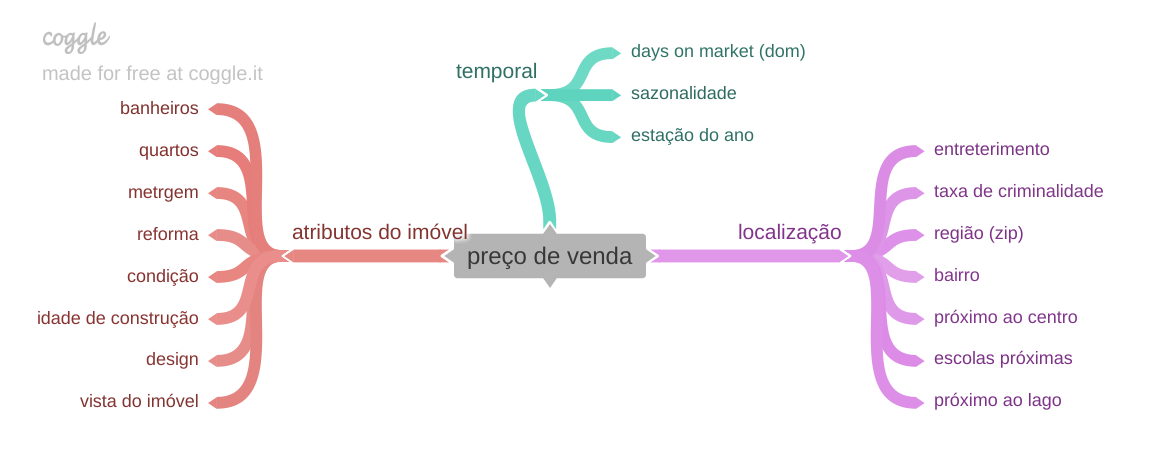

In [17]:
Image('images\MindMapHypotheses.png')

### 2.1.1. Hypotheses Localization

**1.** Imóveis próximo a shoppings são mais caros.

**2.** Imóveis próximos ao centro são mais caros.

**3.** Imóveis próximos a escolas são mais caros.

**4.** Imóveis em bairros onde a taxa de criminalidade é alta são mais baratos.

**5.** Imóveis próximos ao lago com vista para água, deveriam ser 50% mais caros, na média, que imóveis próximos ao lago sem vista.

### 2.1.2. Hypotheses house attributes

**1.** Imóveis que possuem vista para água deveriam ser mais caros na média.

**2.** Imóveis com data de construção menor que 1955 sem renovação deveriam ser mais baratos, na média.

**3.** A mediana de preço de imóveis com 2 andares ou mais, com vista para água deveria ser mais alta, que imóveis com 1 andar e com vista para água.

**4.** Imóveis renovados são 20% mais caros.

**5.** Imóveis em más condições devem ser mais baratos que imóveis com boas condições.

**6.** Há um aumento do preço em média de 10% a cada banheiro adicional.

**7.** Quanto maior o atributo grade do imóvel, a média de preço deve ser maior.

**8.** Imóveis de 3 quartos e 2 banheiros devem ser 10% mais caros que imóveis de 3 quartos e 1 banheiro.

**9.** Imóveis com porão deveriam ser mais caros que imóveis sem porão.

### 2.1.3. Hypotheses temporal

**1.** Imóveis com mais dias disponíveis para venda deveriam ser mais baratos que a médiana da região

**2.** Em períodos com alta demanda de mercado os imóveis são 5% mais caros

**3.** Imóveis disponíveis no inverno são 5% mais baratos que imóveis disponíveis no verão.

### 2.1.4. Final List Hypotheses

**1.** Imóveis que possuem vista para água deveriam ser mais caros na média.

**2.** Imóveis com vista para água, deveriam ser 50% mais caros, na média, que imóveis próximos ao lago sem vista.

**3.** Imóveis com data de construção menor que 1955 sem renovação deveriam ser mais baratos, na média.

**4.** A mediana de preço de imóveis com 2 andares ou mais, com vista para água deveria ser mais alta, que imóveis com 1 andar e com vista para água.

**5.** Imóveis renovados são 20% mais caros.

**6.** Imóveis em más condições devem ser mais baratos que imóveis com boas condições.

**7.** Há um aumento do preço em 10% a cada banheiro adicional.

**8.** Quanto maior o atributo grade do imóvel, a média de preço deve ser maior.

**9.** Imóveis de 3 quartos e 2 banheiros devem ser 10% mais caros que imóveis de 3 quartos e 1 banheiro.

**10.** Imóveis com porão deveriam ser mais caros que imóveis sem porão.


## 2.2. Feature Engineering

In [18]:
#built
df['built'] = df['yr_built'].apply(lambda x: '<1955' if x <= 1955 else '>1955')
#basement
df['basement'] = df['sqft_basement'].apply(lambda x: True if x > 0 else False)
#floor type
df['floors_type'] = df['floors'].apply(lambda x: 'single-story' if x == 1 else 'two-story-or-more')
#renovated
df['renovated'] = df['yr_renovated'].apply(lambda x: 'yes' if x > 0 else 'no')
#condition type
df['condition_type'] = df['condition'].apply(lambda x: 'bad' if x <= 2 else 'good')
#grade
df['grade_design'] = df['grade'].apply(lambda x: 'bad' if x < 6 else 'good')

#seasons
def get_season(date):
    year = str(date.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22/09/'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'
    
df['season'] = df.date.map(get_season)

#sqft to m2
#living
df['m2_living'] = df['sqft_living'].apply(lambda x: x / 10.764)
#lot
df['m2_lot'] = df['sqft_lot'].apply(lambda x: x / 10.764)
#above
df['m2_above'] = df['sqft_above'].apply(lambda x: x / 10.764)
#basement
df['m2_basement'] = df['sqft_basement'].apply(lambda x: x / 10.764)

#m2/price
df['m2_price'] = df.apply(lambda x: x['price'] / x['m2_living'], axis=1)

# 3.0. FILTERING VARIABLES

In [19]:
df1 = df.copy()

In [20]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'built', 'basement',
       'floors_type', 'renovated', 'condition_type', 'grade_design', 'season',
       'm2_living', 'm2_lot', 'm2_above', 'm2_basement', 'm2_price'],
      dtype='object')

## 3.1. Select columns

In [21]:
cols_drop = ['sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','view']
df1 = df1.drop(cols_drop, axis=1)
df1 = df1[['id', 'date', 'season', 'price', 'bedrooms', 'bathrooms', 'm2_living', 'm2_lot', 
          'm2_above', 'm2_basement', 'm2_price', 'floors', 'waterfront', 'condition', 
          'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat','long', 'built', 'basement',
          'floors_type', 'renovated', 'condition_type', 'grade_design']]

# 4.0. EXPLORATION DATA ANALISYS

In [22]:
df2 = df1.copy()

## 4.1. Univariate Analysis

### 4.1.1. Response Variable

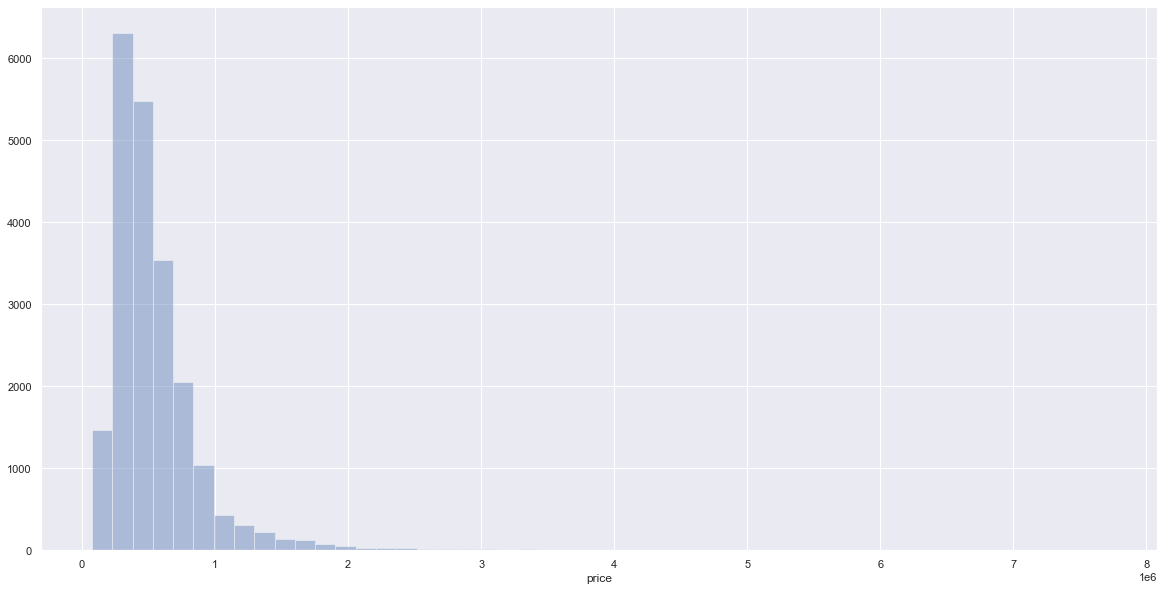

In [23]:
sns.distplot(df2['price'], kde=False);

### 4.1.2. Numerical Variable

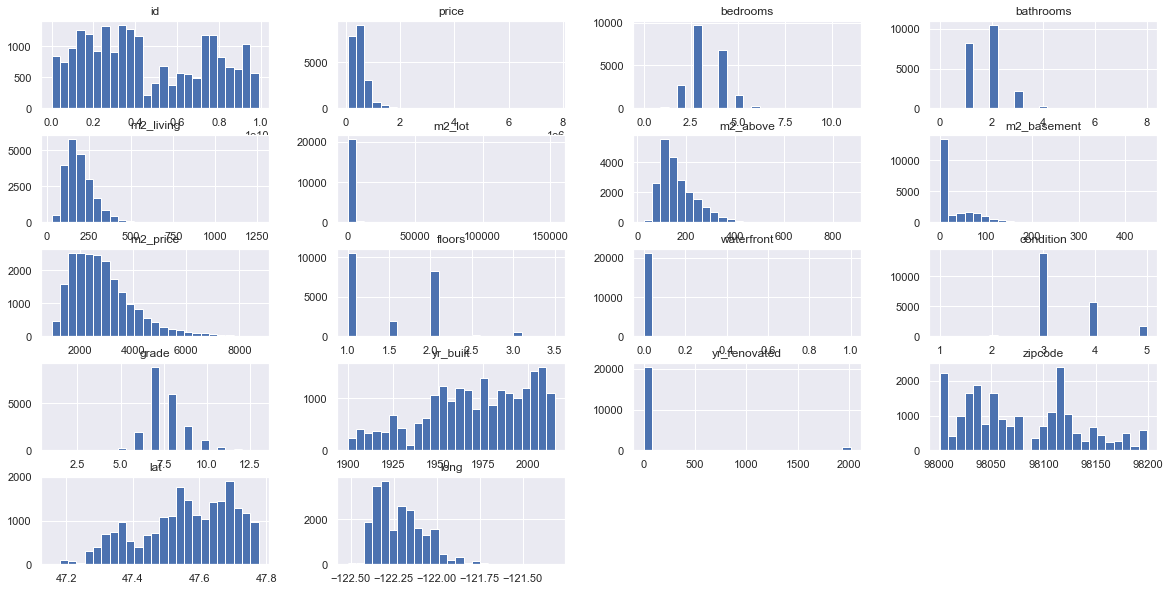

In [24]:
num_attributes2 = df2.select_dtypes(include=['int64','float64'])
num_attributes2.hist(bins=25);

### 4.1.1. Categorical Variable

## 4.2. Bivariate Analysis

### H1. Imóveis que possuem vista para água deveriam ser mais caros na média.
**True** Imóveis com vista para água são mais caros na média.

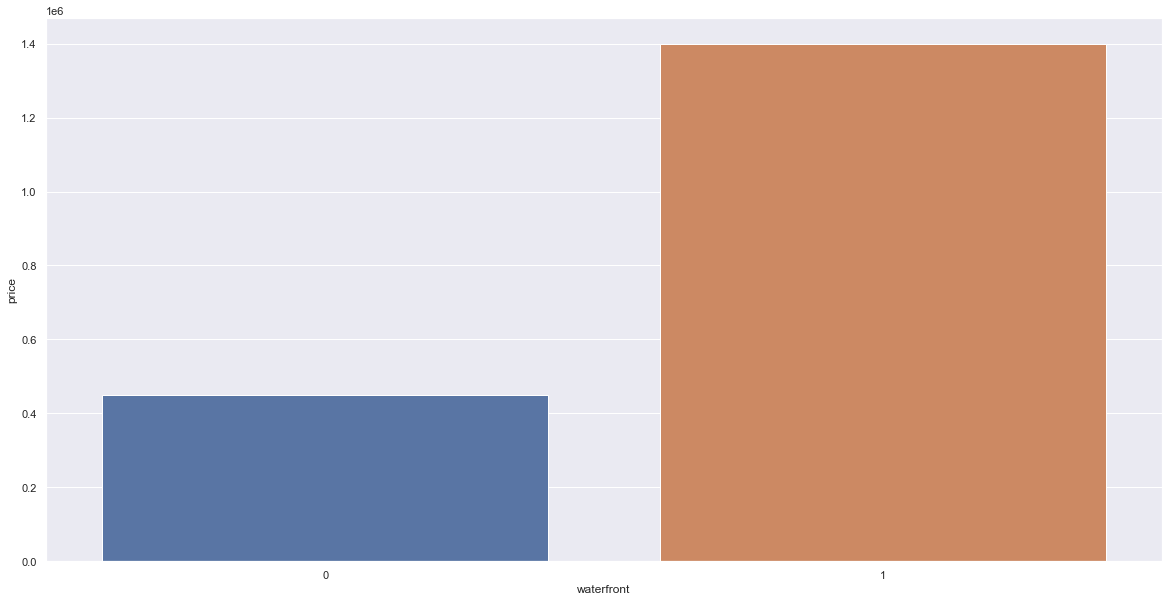

In [124]:
aux1 = df2[['waterfront','price']].groupby('waterfront').median().reset_index()

sns.barplot(x='waterfront', y='price', data=aux1);

### H2. Imóveis com vista para água deveriam ser 50% mais caros, na média, que imóveis próximos ao lago sem vista.

*Para esta hipótese, irei realizar apenas a verificação de uma amostra dos dados, onde a amostra será baseada em imóveis mais próximos ao lake Washington. Nesse sentido foi realizado os seguintes passos:*
1. Coleta de 4 pontos do lago em lat e long;
2. realizar o cálculo de distância de todos os imóveis em relação ao lago (km);
3. adotar premissas para verificar a distância mínima para comparação dos preços, **neste caso 5km**;
4. realizar comparação de preço apenas dos imóveis com as premissas sendo respeitadas.

**False,** apesar dos imóveis com vista serem mais caros, a diferença é cerca de 109%, na média, que imóveis próximos ao lago, porém sem vista.

In [122]:
aux1 = df2.copy()

# create string lat + long
aux1['lat_long'] = aux1[['lat','long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)

# lat and long of 4 spots of lake washington
lake_tuple1 = 47.508853,-122.219156
lake_tuple2 = 47.593199,-122.228501
lake_tuple3 = 47.667237,-122.232624
lake_tuple4 = 47.744864,-122.269727

# distance from Lake in km
aux1['dist_fromlake1'] = aux1['lat_long'].apply(lambda x: great_circle(lake_tuple1, x).km)
aux1['dist_fromlake2'] = aux1['lat_long'].apply(lambda x: great_circle(lake_tuple2, x).km)
aux1['dist_fromlake3'] = aux1['lat_long'].apply(lambda x: great_circle(lake_tuple3, x).km)
aux1['dist_fromlake4'] = aux1['lat_long'].apply(lambda x: great_circle(lake_tuple4, x).km)

aux2 = aux1[(aux1['dist_fromlake1'] < 5 ) | (aux1['dist_fromlake2'] < 5 ) | (aux1['dist_fromlake3'] < 5 ) | (aux1['dist_fromlake4'] < 5 ) ]

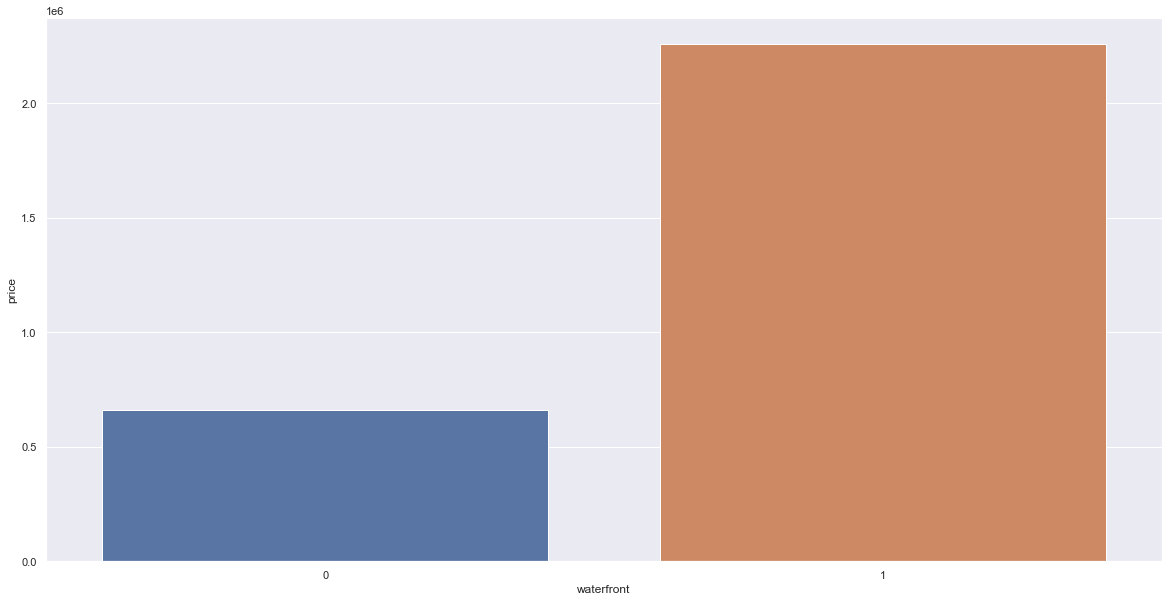

In [123]:
aux3 = aux2[['waterfront','price']].groupby('waterfront').mean().reset_index()

sns.barplot(x='waterfront',y='price',data=aux3);

### H3. Imóveis com data de construção menor que 1955 sem renovação deveriam ser mais baratos, na média.
**True** Imóveis que foram construídos antes de 1955 e não foram renovados são mais baratos em comparação aos outros imóveis.

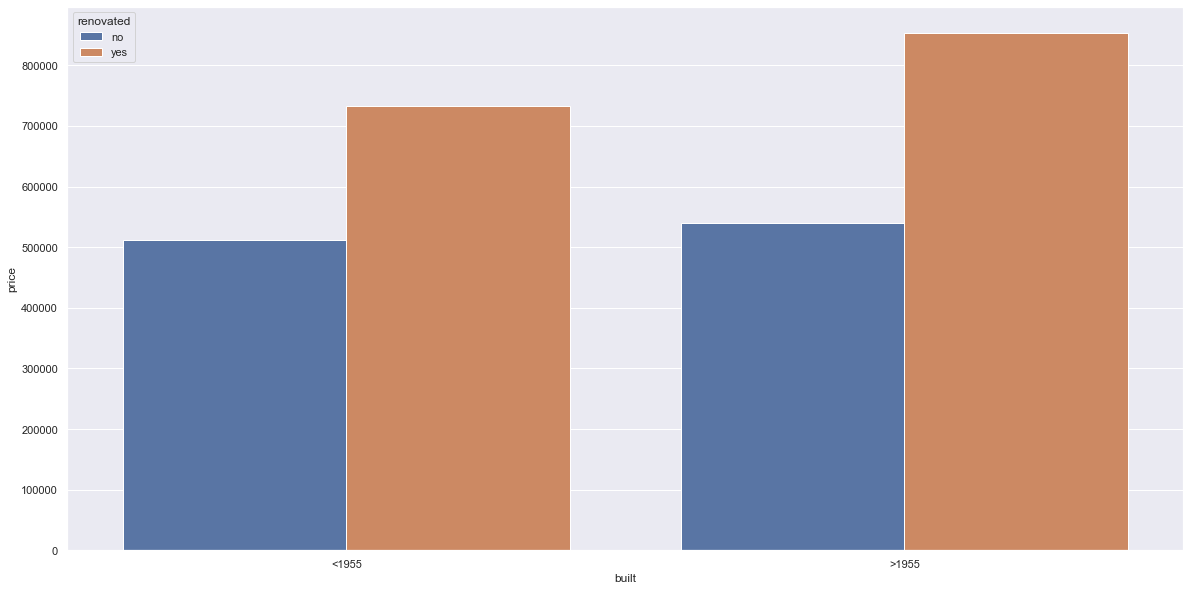

In [26]:
aux1 = df2[['built','renovated','price']].groupby(['built','renovated']).mean().reset_index()
sns.barplot(x='built',y='price',hue='renovated',data=aux1);

### H4. A mediana de preço de imóveis com 2 andares ou mais, com vista para água deveria ser mais alta, que imóveis com 1 andar e com vista para água.
**True** Imóveis com vista para água com 2 andares ou mais, tem o preço mediano maior.

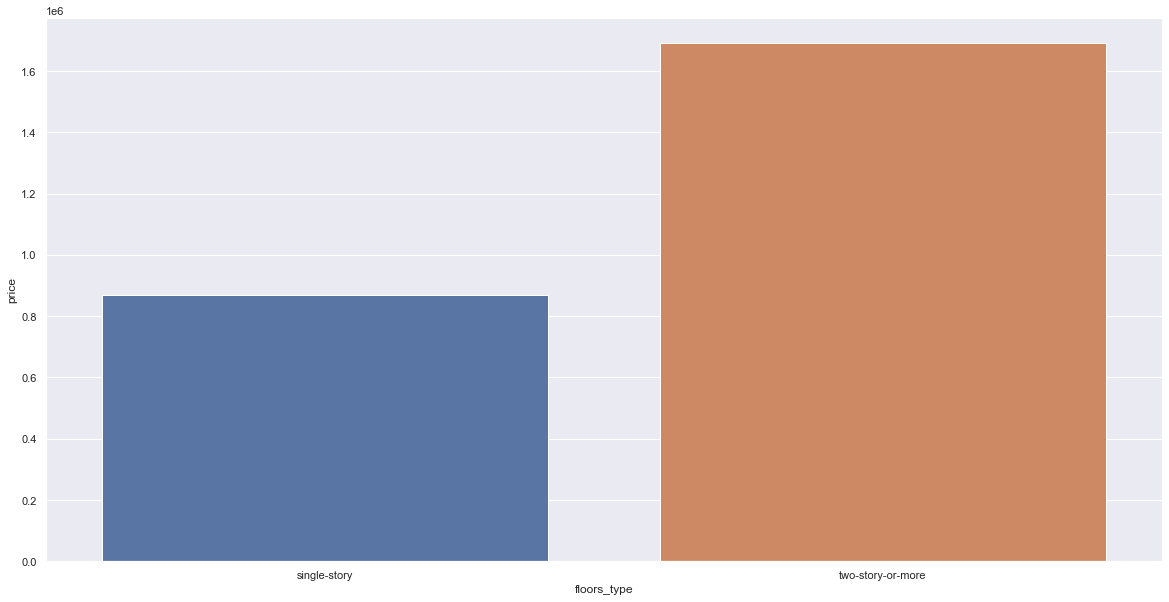

In [27]:
aux1 = df2[df2['waterfront'] == 1]
aux1 = aux1[['floors_type','waterfront','price']].groupby(['floors_type','waterfront']).median().reset_index()
sns.barplot(x='floors_type',y='price', data=aux1);

### H5. Imóveis renovados são 20% mais caros.
**False** Imóveis renovados são aproximadamente 33% mais caros que imóveis não reformados, na mediana de preço.

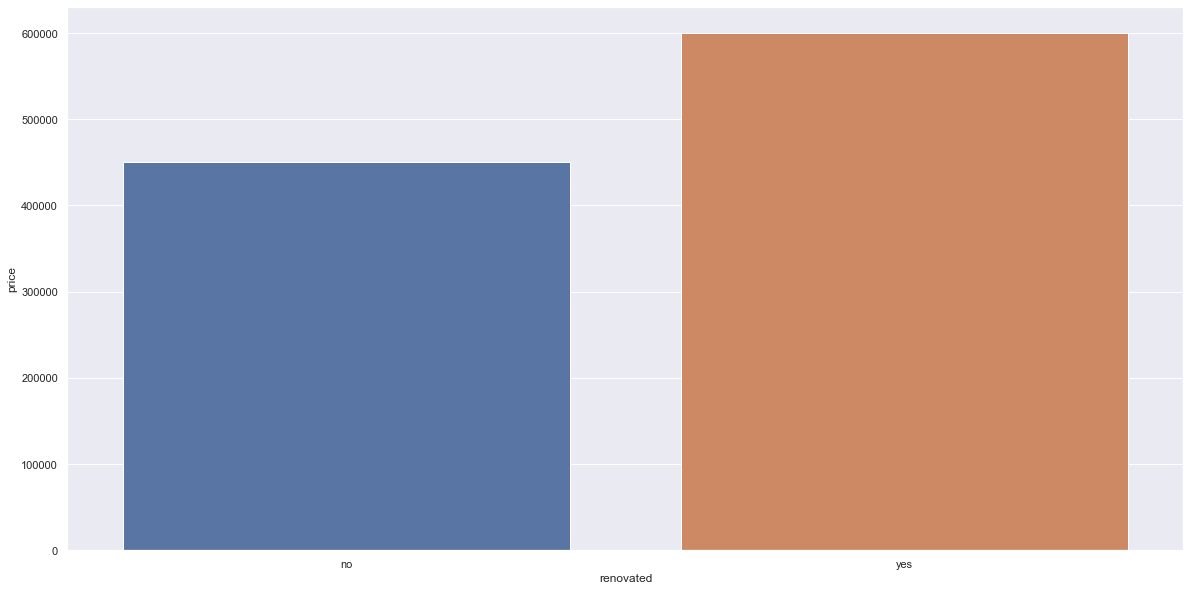

In [28]:
aux1 = df2[['renovated','price']].groupby('renovated').median().reset_index()
sns.barplot(x='renovated',y='price', data=aux1);

### H6. Imóveis em más condições devem ser mais baratos que imóveis com boas condições.
**True** Imóveis em más condições apresentam uma média de preço menor que imóveis reformados.

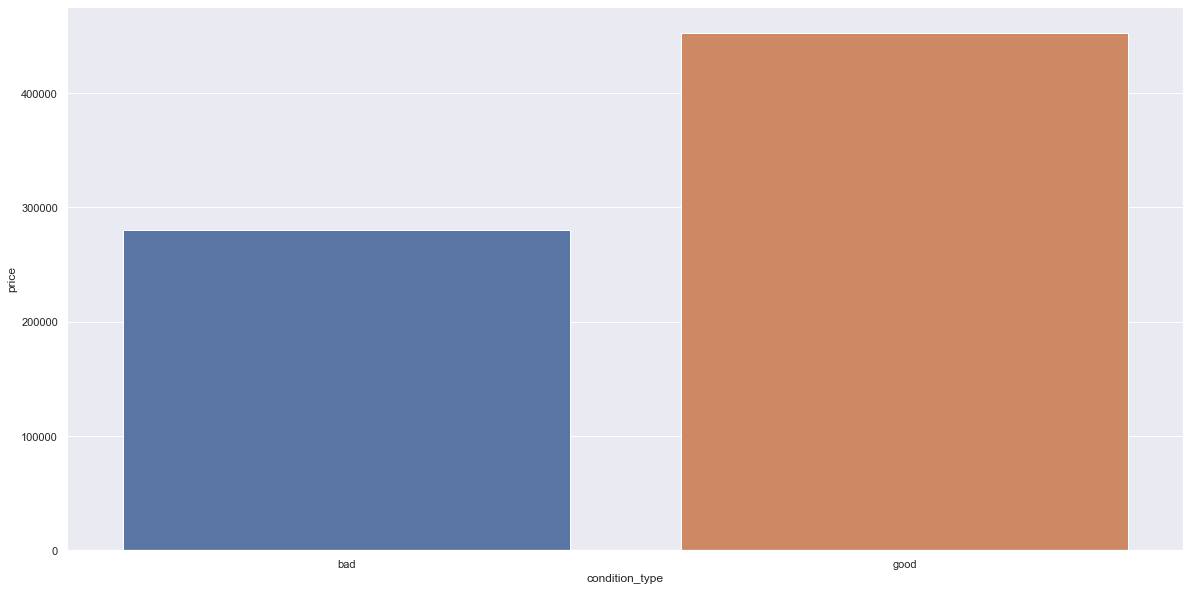

In [29]:
aux1 = df2[['condition_type','price']].groupby('condition_type').median().reset_index()
sns.barplot(x='condition_type', y='price', data=aux1);

### H7. Há um aumento do preço em média de 10% a cada banheiro adicional.
**False** Por mais que exista um crescimento de preço por cada banheiro adicional, a porcentagem média é de aproximadamente 37%.

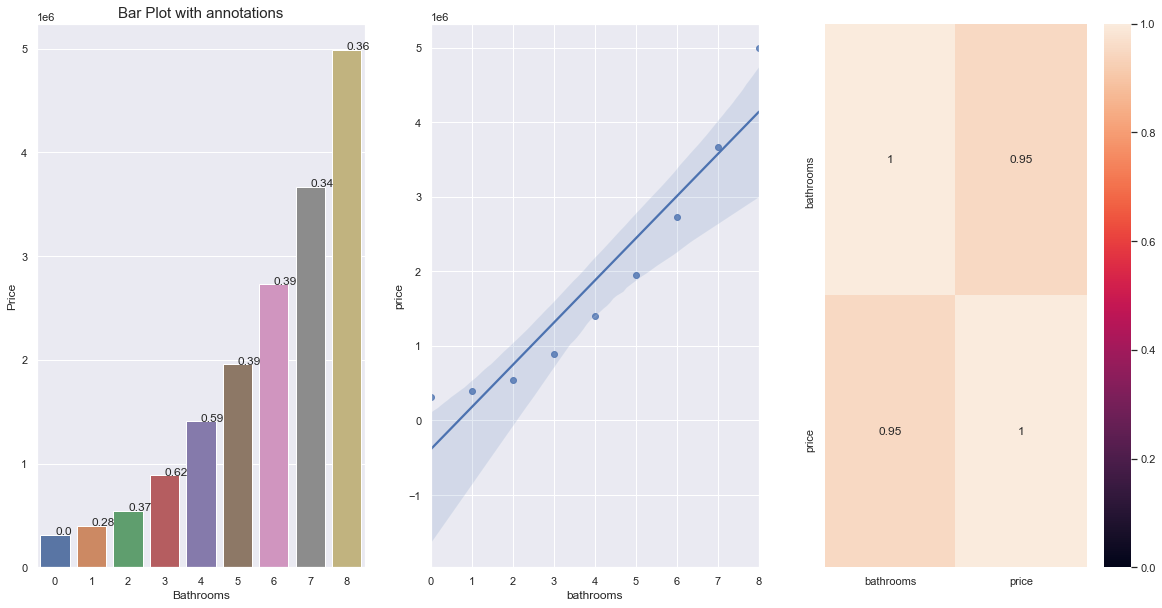

In [30]:
aux1 = df2[['bathrooms', 'price']].groupby('bathrooms').mean().reset_index()
X = aux1['bathrooms'].values
Y = aux1['price'].values

pct = aux1[['price']].pct_change().fillna(0).reset_index()
pct.columns = ['bathrooms', 'price']
p = round(pct['price'],2)

plt.subplot(1,3,1)
sns.barplot(X,Y)
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("Bar Plot with annotations",fontsize=15)

for i, label in enumerate(p):
    plt.annotate(label, (X[i], Y[i]))

plt.subplot(1,3,2)
sns.regplot(x='bathrooms', y='price', data=aux1)
    
plt.subplot(1,3,3)
sns.heatmap(aux1.corr(method='pearson'), annot=True, vmin=0)    

plt.show()

### H8. Quanto maior o atributo grade do imóvel, a média de preço deve ser maior.
**True** Há um crescimento médio de aprox. 35% no preço em relação a nota, quanto maior, maior será o preço.

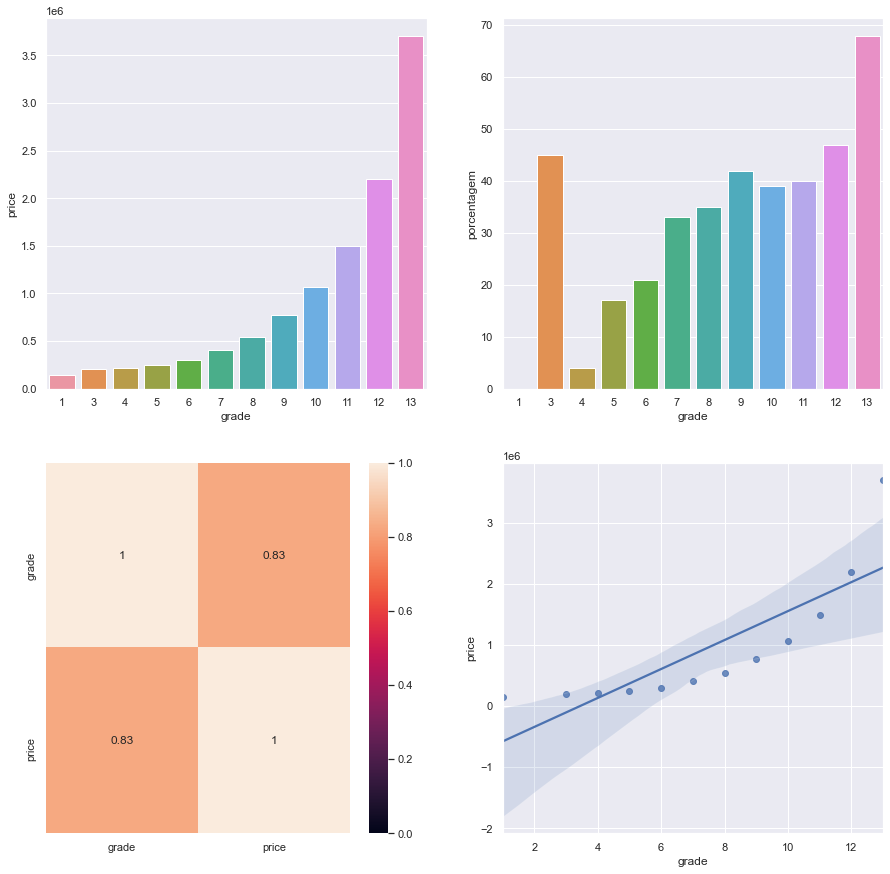

In [188]:
fig = plt.figure(figsize=(15,15))
specs = gridspec.GridSpec(ncols= 2, nrows=2, figure=fig)

ax1 = fig.add_subplot(specs[0,0])
ax2 = fig.add_subplot(specs[0,1])
ax3 = fig.add_subplot(specs[1,0]) 
ax4 = fig.add_subplot(specs[1,1]) 

aux1 = df2[['grade', 'price']].groupby('grade').mean().reset_index()
aux1['grade'] = aux1['grade']
sns.barplot(x='grade', y='price', data=aux1, ax=ax1)

aux2 = df2[['grade', 'price']].groupby('grade').mean().reset_index()
aux2['price'] = aux2['price'].pct_change()
aux2['grade'] = aux2['grade'].astype(str)
aux2['price'] = round(aux2['price'], 2) * 100
aux2.columns = ['grade', 'porcentagem']
sns.barplot(x='grade', y='porcentagem', data=aux2, ax=ax2)

sns.heatmap(aux1.corr(method='pearson'),annot=True, vmin=0, ax=ax3)

sns.regplot( x='grade', y='price', data=aux1, ax=ax4);

### H9. Imóveis de 3 quartos e 2 banheiros devem ser 10% mais caros que imóveis de 3 quartos e 1 banheiro.
**Falso** Os imóveis com 3 quartos e 2 banheiro são mais caros, porém aproximadamente 29%.

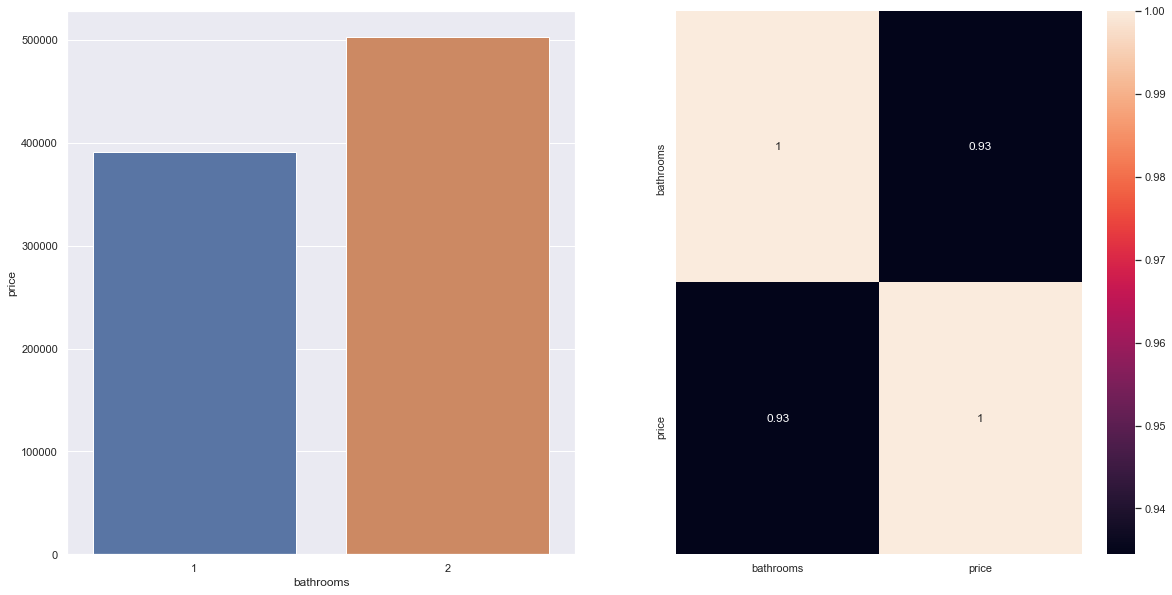

In [189]:
aux1 = df2[(df2['bedrooms'] == 3) & (df2['bathrooms'] <= 2) ]
aux1 = aux1[aux1['bathrooms'] != 0]
aux1 = aux1[['bathrooms','price']].groupby('bathrooms').mean().reset_index()

aux2 = df2[['bathrooms','price']].groupby('bathrooms').median().reset_index()


plt.subplot(1,2,1)
sns.barplot(x='bathrooms',y='price',data=aux1)

plt.subplot(1,2,2)
sns.heatmap(aux2.corr(method='pearson'), annot=True);

### H10. Imóveis com porão deveriam ser mais caros que imóveis sem porão.
**True**

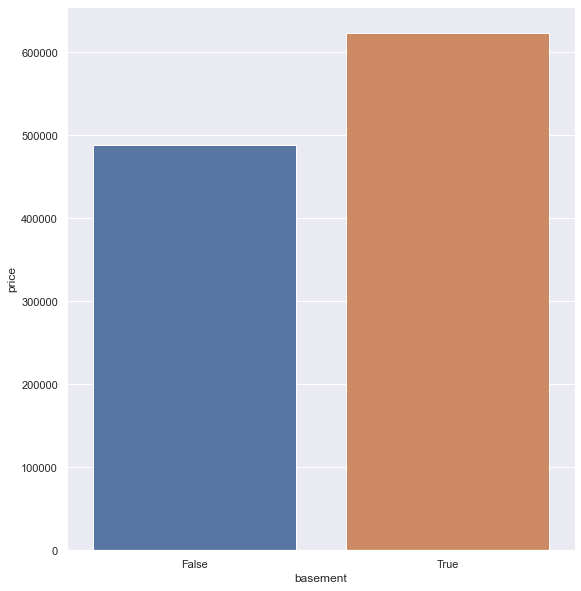

In [33]:
aux1 = df2[['basement','price']].groupby('basement').mean().reset_index()

plt.subplot(1,2,1)
sns.barplot(x='basement', y='price', data=aux1);

## 4.3. Multvariate Analysis

### 4.3.1  Numerical Attributes  

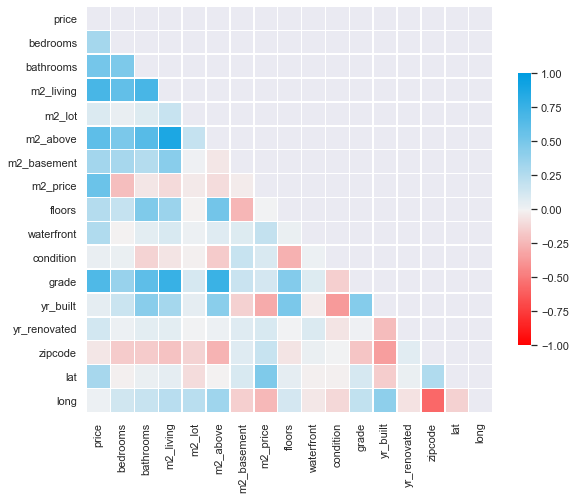

In [34]:
#Gerando matrix 
n = df2.select_dtypes(include=['int64','float64'])
matrix = n.copy()
matrix = matrix.drop(['id'], axis = 1)
matrix = matrix.corr()

#Gerando máscara
mask = np.triu(np.ones_like(matrix, dtype=bool))

#Gerando novo mapa de cores
cmap = sns.diverging_palette(20, 220, 300, as_cmap=True)

#Plotando matrix
plt.subplot(1,2,1)
sns.heatmap(matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## 4.4. Hypotheses Overview

In [184]:
hipoteses = [['Hipóteses','Resultado','Relevância', 'Resumo'],
['H1','Verdadeiro','Média', 'Imóveis com vista para água são mais caros na média.'],
['H2','Falsa','Alta','Apesar dos imóveis com vista serem mais caros, a diferença é cerca de 109%'],
['H3','Verdadeiro','Alta','Imóveis que foram construídos antes de 1955 e não foram renovados são mais baratos.'],
['H4','Verdadeiro','Média', 'Imóveis com vista para água com 2 andares ou mais, tem o preço mediano maior.'],
['H5','Falso','Média',' Imóveis renovados são aproximadamente 33% mais caros na mediana de preço.'],
['H6','Verdadeira','Alta','Imóveis em más condições apresentam uma média de preço menor que imóveis reformados.'],
['H7','Falso','Baixa','Por mais que exista um crescimento a porcentagem média é de aproximadamente 37%.'],
['H8','Verdadeira','Baixa','Há um crescimento médio de aprox. 35% no preço em relação ao grade'],
['H9','Falsa','Média','Os imóveis com 3 quartos e 2 banheiro são mais caros, porém aproximadamente 29%.'],
['H10','Verdadeira','Baixa','Imóveis com porão são mais caros que imóveis sem porão']]

print(tabulate(hipoteses,headers='firstrow'))

Hipóteses    Resultado    Relevância    Resumo
-----------  -----------  ------------  ------------------------------------------------------------------------------------
H1           Verdadeiro   Média         Imóveis com vista para água são mais caros na média.
H2           Falsa        Alta          Apesar dos imóveis com vista serem mais caros, a diferença é cerca de 109%
H3           Verdadeiro   Alta          Imóveis que foram construídos antes de 1955 e não foram renovados são mais baratos.
H4           Verdadeiro   Média         Imóveis com vista para água com 2 andares ou mais, tem o preço mediano maior.
H5           Falso        Média         Imóveis renovados são aproximadamente 33% mais caros na mediana de preço.
H6           Verdadeira   Alta          Imóveis em más condições apresentam uma média de preço menor que imóveis reformados.
H7           Falso        Baixa         Por mais que exista um crescimento a porcentagem média é de aproximadamente 37%.
H8           Verda

# 5.0. SOLUTIONS FOR BUSINESS QUESTIONS

In [136]:
df3 = df2.copy()

## 5.1. Quais são os imóveis que a House Rocket deveria comprar e por qual preço?

### 5.1.1. New Features and Filters conditions

In [155]:
df4 = df3.copy()

# median by zipcode
df4 = df4[['zipcode','price']].groupby('zipcode').median().reset_index()
df4.columns = ['zipcode','price_median']

df5 = pd.merge(df3, df4, on='zipcode', how='inner')  

# filter by price_median and condition 
df5['status'] = 'NA'
for i in range(len(df5)):
    if (df5.loc[i, 'price'] < df5.loc[i, 'price_median']) & (df5.loc[i, 'condition'] > 2):
        df5.loc[i, 'status'] = 'buy'
    else:
        df5.loc[i, 'status'] = 'dont buy'

df6 = df5.copy()

# median price by zipcode + season of availability date to buy
df6 = df6[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()
df6.columns = ['zipcode','season','season_median']

df7 = pd.merge(df5, df6, on=['zipcode','season'], how='inner')

# median price of season 
df8 = df7[['zipcode','season','price']].groupby(['zipcode','season']).median().reset_index()
df8 = df8.pivot(index='zipcode', columns='season', values='price').reset_index()

df9 = pd.merge(df7, df8, on='zipcode', how='inner')

# calculate sell price of houses based on the median price of season
for i in range(len(df9)):
    if df9.loc[i, 'price'] >= df9.loc[i, 'season_median']:
        df9.loc[i, 'sell_price'] = (df9.loc[i, 'price'] * 0.10) + df9.loc[i, 'price']
    else:
        df9.loc[i, 'sell_price'] = (df9.loc[i, 'price'] * 0.30) + df9.loc[i, 'price']

# selecting the best season to sell houses, based on median price of each season
i = 0
df9['best_season'] = ''
while i < len(df9):
    cols = ['autumn','spring','summer','winter']
    if df9.loc[i, cols[0]] >= df9.loc[i, 'sell_price']:
        df9.loc[i, 'best_season'] = df9.loc[i, 'best_season'] + 'autumn'
    if df9.loc[i, cols[1]] >= df9.loc[i, 'sell_price']:
        df9.loc[i, 'best_season'] = df9.loc[i, 'best_season'] + ',' + 'spring'
    if df9.loc[i, cols[2]] >= df9.loc[i, 'sell_price']:
        df9.loc[i, 'best_season'] = df9.loc[i, 'best_season'] + ',' + 'summer'
    if df9.loc[i, cols[3]] >= df9.loc[i, 'sell_price']:
        df9.loc[i, 'best_season'] = df9.loc[i, 'best_season'] + ',' + 'winter'
    if df9.loc[i, 'best_season'] == '':
        df9.loc[i, 'best_season'] = 'no_season'
    i = i + 1

# remove first comma of string
for i in range(len(df9)):
    df9.loc[i, 'best_season'] = df9.loc[i, 'best_season'].lstrip(',')        

# expected profit
df9['profit'] = df9['sell_price'] - df9['price']

# houses to buy
report = df9[['id', 'zipcode', 'season', 'price', 'price_median', 'status', 'sell_price', 'profit', 'best_season']]
report = report[(report['best_season'] != 'no_season') & (report['status'] == 'buy')].sort_values('id', ascending=True)
report = report[['id', 'zipcode', 'season', 'price', 'price_median', 'status', 'sell_price', 'profit']].reset_index(drop=True)

In [160]:
#Exportar para CSV
#df9.to_csv('kc_houses_solution.csv', index=False)

### 5.1.2 Solution 1 - Report

In [156]:
report

,id,zipcode,season,price,price_median,status,sell_price,profit
0,3800008,98178,winter,178000.00,279500.00,buy,231400.00,53400.00
1,7200179,98055,spring,175000.00,297225.00,buy,227500.00,52500.00
2,7400062,98118,spring,299800.00,370000.00,buy,389740.00,89940.00
3,7600065,98122,spring,465000.00,574000.00,buy,604500.00,139500.00
4,7600136,98122,summer,411000.00,574000.00,buy,534300.00,123300.00
...,...,...,...,...,...,...,...,...
5167,9834201215,98144,autumn,276000.00,452500.00,buy,358800.00,82800.00
5168,9834201366,98144,autumn,429900.00,452500.00,buy,472890.00,42990.00
5169,9834201470,98144,autumn,303000.00,452500.00,buy,393900.00,90900.00
5170,9895000040,98027,summer,399900.00,571000.00,buy,519870.00,119970.00


## 5.2. Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

### 5.2.1 Solution 2 - Report

In [164]:
# report with best season to sell
report2 = df9[['id', 'zipcode', 'season', 'price', 'price_median', 'status', 'sell_price', 'profit', 'best_season']]
report2 = report2[(report2['best_season'] != 'no_season') & (report['status'] == 'buy')].sort_values('id', ascending=True)
report2 = report2[['id', 'zipcode', 'season', 'price', 'price_median', 'status', 'sell_price', 'profit','best_season']].reset_index(drop=True)
report2

,id,zipcode,season,price,price_median,status,sell_price,profit,best_season
0,3800008,98178,winter,178000.00,279500.00,buy,231400.00,53400.00,"autumn,spring,summer,winter"
1,34000005,98136,spring,343566.00,489950.00,buy,446635.80,103069.80,"autumn,spring,summer,winter"
2,66000070,98126,spring,315000.00,396587.50,buy,409500.00,94500.00,"spring,winter"
3,66000140,98126,autumn,398000.00,396587.50,dont buy,437800.00,39800.00,winter
4,84000105,98146,spring,255000.00,312000.00,buy,331500.00,76500.00,spring
...,...,...,...,...,...,...,...,...,...
1208,9528104360,98115,summer,435000.00,570000.00,buy,565500.00,130500.00,"spring,winter"
1209,9536601996,98198,spring,149500.00,266750.00,buy,194350.00,44850.00,"autumn,spring,summer,winter"
1210,9547201850,98115,summer,420000.00,570000.00,buy,546000.00,126000.00,"autumn,spring,summer,winter"
1211,9553200052,98115,spring,345000.00,570000.00,buy,448500.00,103500.00,"autumn,spring,summer,winter"


### 5.2.1 Solution 2 - Plot season frequency

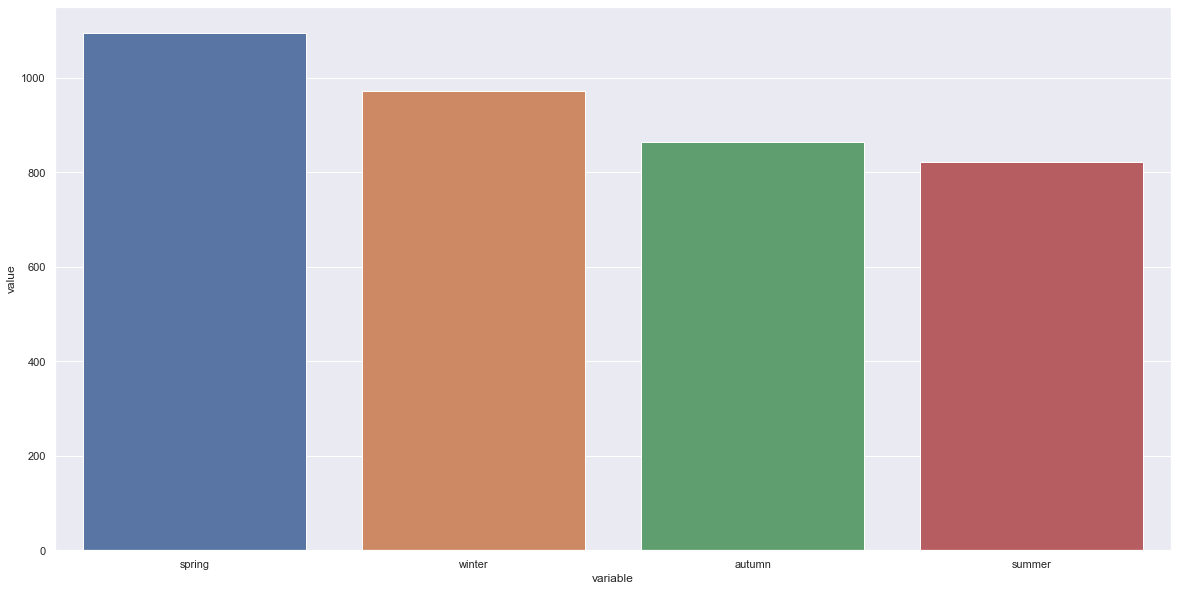

In [166]:
#Além da melhor season estar indicada na coluna best_season da tabela anterior, a seguirm plot das seasons com maior recorrência
season = report2.copy()
season = season['best_season'].tolist()
season = ','.join(season)
season = season.split(',')
season_count = Counter(season)
season_count = pd.DataFrame(([season_count]))
season_count = season_count.melt().sort_values('value', ascending=False)
sns.barplot(data=season_count, x='variable', y='value');

## 5.3. Resultados para o negócio

Também foi realizado um filtro para sugerir a compra dos Top 20 imóveis, por **lucratividade**, por **baixo investimento** e um Bônus de **imóveis para reforma com maior ganho**.

### 5.3.1 Top 20 Houses with best profits

In [168]:
#Por lucratividade
sample = report2[(report2['best_season'] != 'no_season') & (report2['status'] == 'buy')].sort_values('profit', ascending=False)
sample = sample.iloc[0:21,:].copy()
sample.reset_index(drop=True)

,id,zipcode,season,price,price_median,status,sell_price,profit,best_season
0,7511200020,98053,summer,509900.00,635000.00,buy,662870.00,152970.00,"autumn,spring"
1,8682282180,98053,autumn,509000.00,635000.00,buy,661700.00,152700.00,"autumn,spring"
2,8682250350,98053,autumn,507000.00,635000.00,buy,659100.00,152100.00,"autumn,spring"
3,8562901010,98074,autumn,505000.00,645000.00,buy,656500.00,151500.00,spring
4,8078430360,98074,autumn,505000.00,645000.00,buy,656500.00,151500.00,spring
5,2525069041,98053,summer,505000.00,635000.00,buy,656500.00,151500.00,"autumn,spring"
6,8682262240,98053,spring,505000.00,635000.00,buy,656500.00,151500.00,"autumn,spring"
7,8682260850,98053,summer,504975.00,635000.00,buy,656467.50,151492.50,"autumn,spring"
8,7715800430,98074,autumn,502000.00,645000.00,buy,652600.00,150600.00,spring
9,6902000100,98074,summer,500000.00,645000.00,buy,650000.00,150000.00,spring


In [170]:
#Lucratividade / Investimento e Lucro Esperado
dic = {"Investimento Inicial": sample['price'].sum(), 'Lucro Esperado': sample['profit'].sum()}
capital = pd.Series(dic).to_frame('Valor USD')
capital

,Valor USD
Investimento Inicial,10548675.00
Lucro Esperado,3164602.50


### 5.3.2 Top 20 low-investment 

In [171]:
#Baixo investimento
sample2 = report2[(report2['best_season'] != 'no_season') & (report2['status'] == 'buy')].sort_values('price', ascending=True)
sample2 = sample2.iloc[0:21,:].copy()
sample2.reset_index(drop=True)

,id,zipcode,season,price,price_median,status,sell_price,profit,best_season
0,1721801591,98146,winter,89950.00,312000.00,buy,116935.00,26985.00,"autumn,spring,summer,winter"
1,6929602721,98198,spring,95000.00,266750.00,buy,123500.00,28500.00,"autumn,spring,summer,winter"
2,2724200705,98198,autumn,95000.00,266750.00,buy,123500.00,28500.00,"autumn,spring,summer,winter"
3,7813200115,98178,summer,100000.00,279500.00,buy,130000.00,30000.00,"autumn,spring,summer,winter"
4,7211402105,98146,autumn,106000.00,312000.00,buy,137800.00,31800.00,"autumn,spring,summer,winter"
5,5111400086,98038,spring,110000.00,342500.00,buy,143000.00,33000.00,"autumn,spring,summer,winter"
6,7889600230,98146,autumn,114000.00,312000.00,buy,148200.00,34200.00,"autumn,spring,summer,winter"
7,892000025,98146,summer,114975.00,312000.00,buy,149467.50,34492.50,"autumn,spring,summer,winter"
8,623049232,98146,summer,115000.00,312000.00,buy,149500.00,34500.00,"autumn,spring,summer,winter"
9,8151600101,98146,winter,115000.00,312000.00,buy,149500.00,34500.00,"autumn,spring,summer,winter"


In [172]:
#Baixo investimento / Investimento e Lucro Esperado
dic2 = {"Investimento Inicial": sample2['price'].sum(), 'Lucro Esperado': sample2['profit'].sum()}
capital2 = pd.Series(dic2).to_frame('Valor USD')
capital2

,Valor USD
Investimento Inicial,2411125.00
Lucro Esperado,723337.50


### 5.3.3 Top 20 to renovated by profit
*O valor da reforma calculado: 8% do valor da compra de imóveis em condição 2 e 10% para imóveis em condições 1*

In [176]:
#Imóveis para Reforma com maior ganho
report3 = df9[(df9['best_season'] != 'no_season') & (df9['status'] == 'dont buy')]
report3 = report3[report3['condition'] < 3].sort_values('profit',ascending=False)
report3 = report3[['id', 'zipcode', 'season', 'price', 'price_median', 'condition', 'sell_price', 'profit', 'best_season']]
sample3 = report3.iloc[0:21,:].copy().reset_index()
sample3 = sample3.drop('index', axis=1)
for i in range(len(sample3)):
    if sample3.loc[i, 'condition'] == 2:
        sample3.loc[i, 'renovate_cost'] = sample3.loc[i, 'price'] * 0.08
    else:
        sample3.loc[i, 'renovate_cost'] = sample3.loc[i, 'price'] * 0.10

for i in range(len(sample3)):
    sample3.loc[i, 'profit_adjusted'] = sample3.loc[i, 'profit'] - sample3.loc[i, 'renovate_cost']
    
sample3 = sample3[['id','zipcode','season','price','condition','renovate_cost','sell_price','profit_adjusted']]
sample3

,id,zipcode,season,price,condition,renovate_cost,sell_price,profit_adjusted
0,3623500135,98040,spring,800000.00,2,64000.00,1040000.00,176000.00
1,5459500165,98040,summer,623000.00,2,49840.00,809900.00,137060.00
2,6788200605,98112,winter,575000.00,2,46000.00,747500.00,126500.00
3,6072760390,98006,spring,547500.00,2,43800.00,711750.00,120450.00
4,3886902445,98033,winter,535000.00,1,53500.00,695500.00,107000.00
5,3578400950,98074,summer,492450.00,2,39396.00,640185.00,108339.00
6,9828701745,98112,winter,480000.00,2,38400.00,624000.00,105600.00
7,6205500030,98005,autumn,480000.00,2,38400.00,624000.00,105600.00
8,6672700120,98052,autumn,459000.00,2,36720.00,596700.00,100980.00
9,1868901275,98115,winter,455000.00,2,36400.00,591500.00,100100.00


In [177]:
#Imóveis para Reforma com maior ganho / Investimento e Lucro Esperado
dic3 = {"Investimento Inicial": sample3['price'].sum(),
            "Investimento em reforma": sample3['renovate_cost'].sum(), 'Lucro Esperado': sample3['profit_adjusted'].sum()}
capital3 = pd.Series(dic3).to_frame('Valor USD')
capital3

,Valor USD
Investimento Inicial,9997450.00
Investimento em reforma,851406.00
Lucro Esperado,2147829.00
